# BioDiversity 

## Intro

The goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations. The data is inspired by real data, but is mostly fictional. The project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.
Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?

- Are certain types of species more likely to be endangered?

- Which animal is most prevalent and what is their distribution amongst parks?


## Import libraries and load data

In [193]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [194]:
species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

## Examine the Data

### Species
The species data frame contains information on the different species in the National Parks. The columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status
v

In [195]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [196]:
print(f"Species shape: {species.shape}")

Species shape: (5824, 4)


Species data frame has 5,824 rows.

In [197]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [198]:
species = species.fillna(value={'conservation_status':'No Intervention'})

Data frame species has around 97% missing values in conservation_status category. We can assume it is structuraly missing data and replace it with 'No Intervention' status.


In [199]:
species_duplicates = species.duplicated()
species_duplicates.value_counts()

False    5824
dtype: int64

No duplicate values.

In [200]:
print(f"Number of species:{species.scientific_name.nunique()}")

Number of species:5541


In [201]:
print(f"Categories of species:{species.category.unique()}")

Categories of species:['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


## Analysis

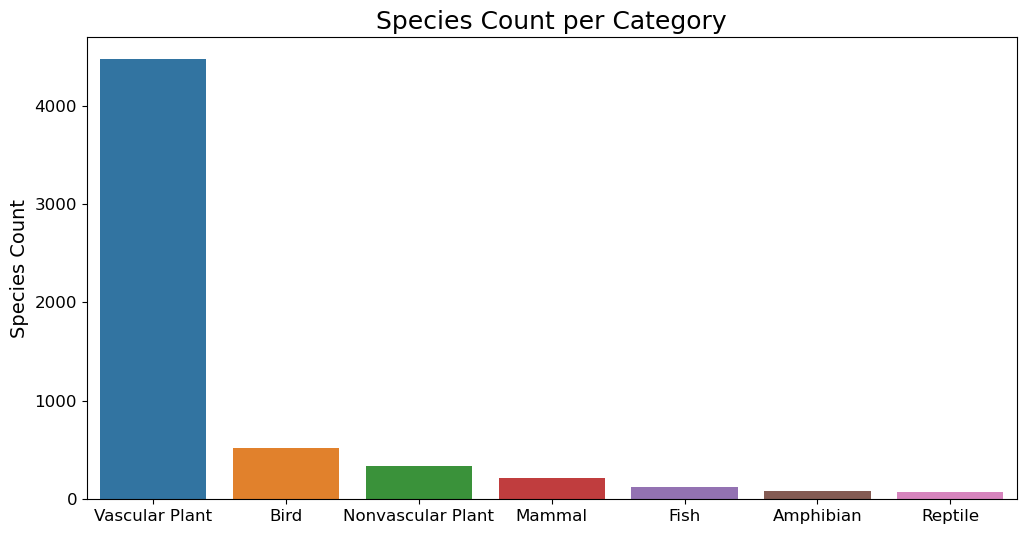

In [202]:
category_species_count = species.groupby('category')[['scientific_name']].count()
category_species_count.rename({'scientific_name': 'scientific_name_count'}, inplace= True, axis= 1)

plt.subplots(figsize= (12, 6)) 
plt.ticklabel_format(style= 'plain', axis= 'y')
sns.barplot(data= category_species_count, x= category_species_count.index, y= 'scientific_name_count', 
            order= category_species_count.sort_values('scientific_name_count', ascending= False).index)
plt.title('Species Count per Category',fontsize=18)
plt.xlabel('')
plt.ylabel('Species Count', fontsize= 14)
plt.xticks(fontsize= 12);
plt.yticks(fontsize= 12);
plt.savefig('Species Count per Category.png', dpi= 600)

#### Summary Statistics

In [203]:
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,5824
unique,7,5541,5504,5
top,Vascular Plant,Castor canadensis,Brachythecium Moss,No Intervention
freq,4470,3,7,5633


### Observations
The observations data frame contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [205]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [206]:
print(f"Observations shape: {observations.shape}")

Observations shape: (23296, 3)


Observations has 23,296 rows and 3 columns.

In [207]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


No missing values.

In [208]:
observations_duplicates = observations.duplicated()
observations_duplicates.value_counts()

False    23281
True        15
dtype: int64

In [209]:
observations = observations.drop_duplicates()

15 duplicate values removed.

In [210]:
print(f"Name of the parks:{observations.park_name.unique()}")

Name of the parks:['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [211]:
print(f"Number of species:{observations.scientific_name.nunique()}")

Number of species:5541


## Analysis

In [212]:
total_observations_by_park = observations.groupby('park_name')['observations'].sum().reset_index().sort_values(by='observations', ascending=False)

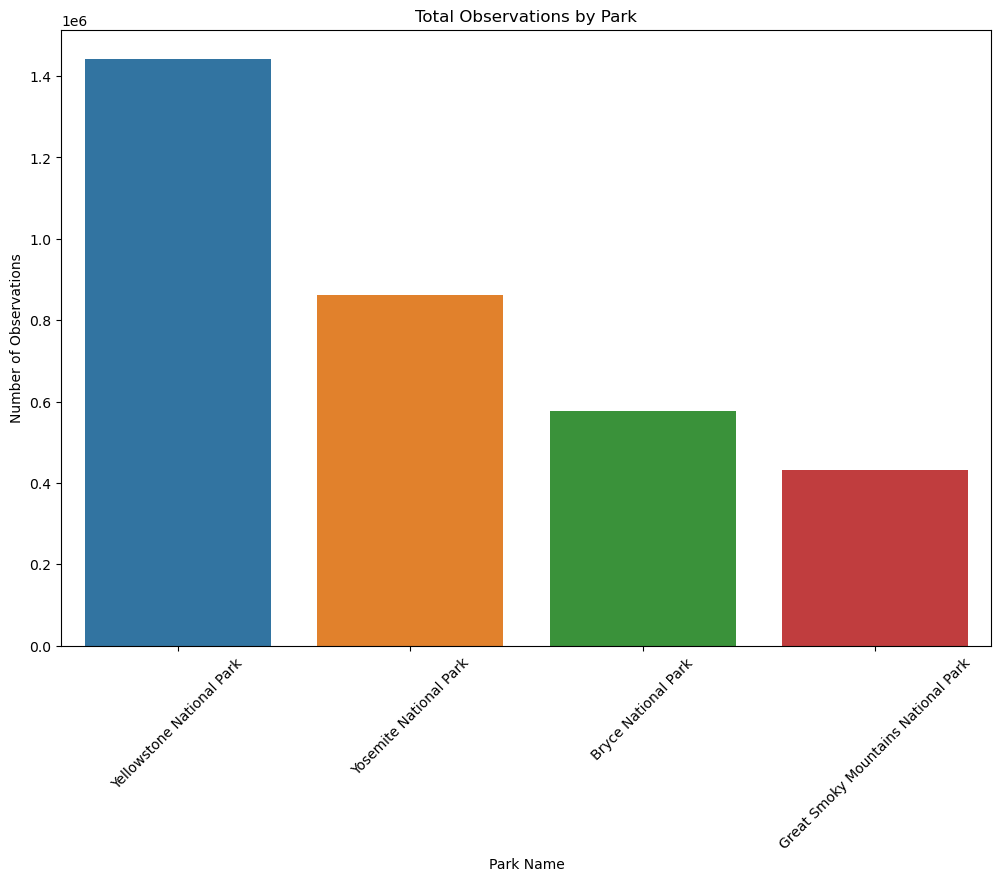

In [213]:
plt.figure(figsize=(12, 8))
sns.barplot(data=total_observations_by_park, x='park_name', y='observations')
plt.title('Total Observations by Park')
plt.xlabel('Park Name')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.show()

In [214]:
park_sizes = {
    'park_name': [
        'Yellowstone National Park', 
        'Yosemite National Park', 
        'Great Smoky Mountains National Park', 
        'Bryce Canyon National Park'
    ],
    'size_in_acres': [
        2219791, 
        761747, 
        522427, 
        35835
    ]
}

In [215]:
park_sizes_df = pd.DataFrame(park_sizes)

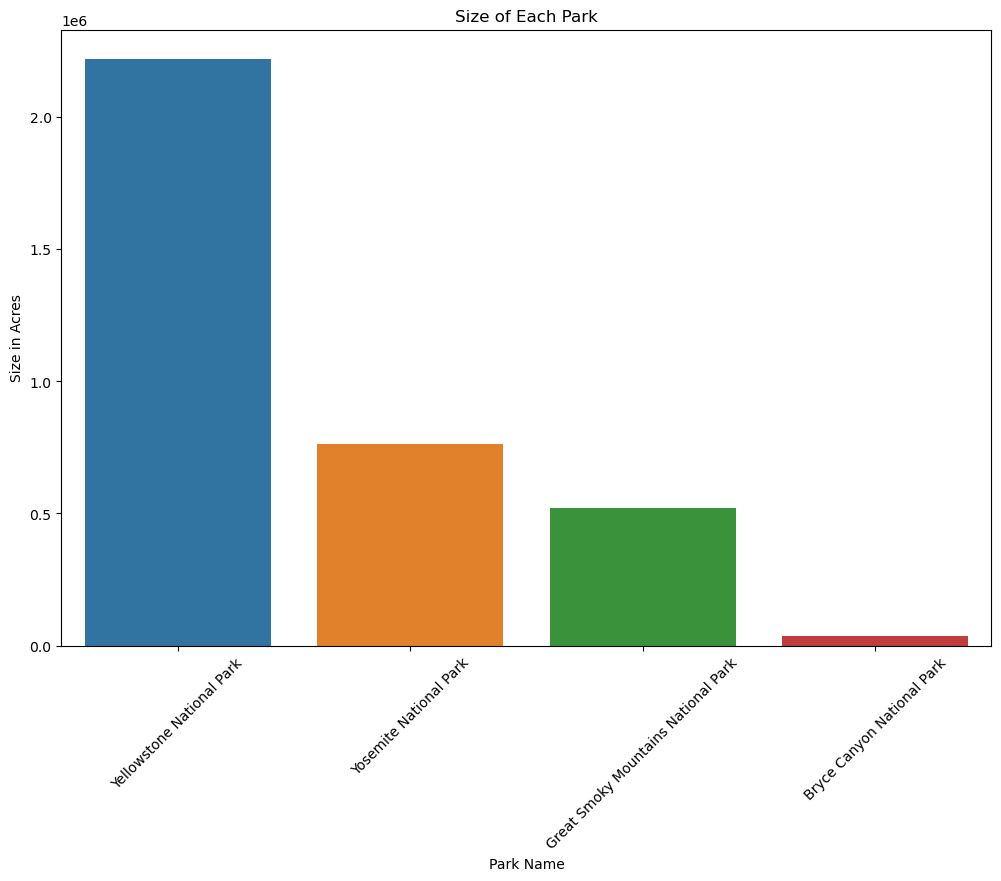

In [216]:
plt.figure(figsize=(12, 8))
sns.barplot(data=park_sizes_df, x='park_name', y='size_in_acres')
plt.title('Size of Each Park')
plt.xlabel('Park Name')
plt.ylabel('Size in Acres')
plt.xticks(rotation=45)
plt.show()

#### Summary Statistics

In [217]:
observations.describe()

,observations
count,23281.000000
mean,142.280357
std,69.885439
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


## Questions

### What is the distribution of conservation status for species?

In [219]:
print(f"Unique conservation statuses:{species.conservation_status.unique()}")

Unique conservation statuses:['No Intervention' 'Species of Concern' 'Endangered' 'Threatened'
 'In Recovery']


Missing values replaced with 'No Intervention' status which is excluded from the further analys.

In [220]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

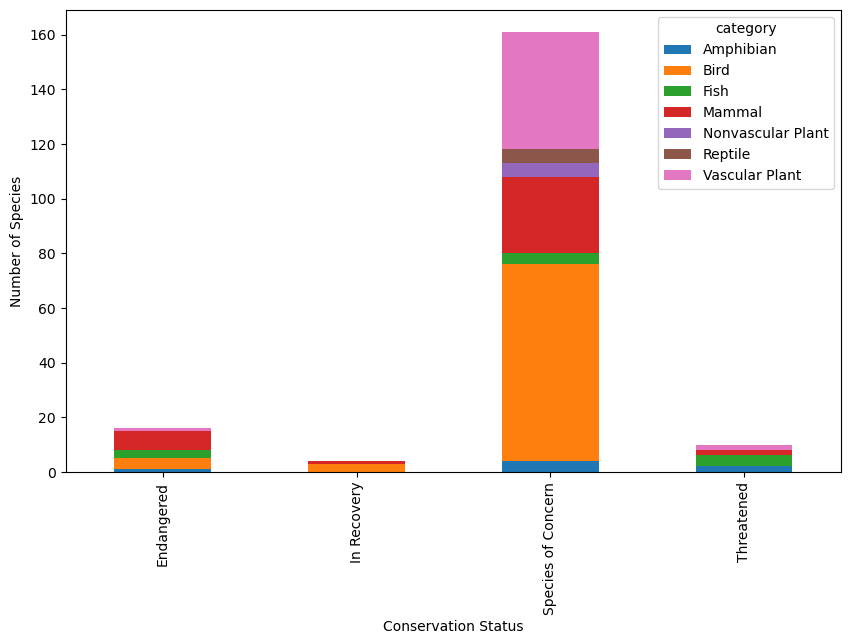

In [221]:
ax = conservationCategory.plot(kind = 'bar', figsize=(10,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");


"Species of Concern" is the largest category, followed by "Endangered", "Threatened", and "In Recovery".

### Are certain types of species more likely to be endangered?

In order to answer this question we create a new column 'is_endangered' and convert the boolean values to integers.
The data is grouped by category to calculate the number of total species and the number of endangered species. The  dataframes are merged and the proportion of endangered species is then computed for each category.
Finally, the results are visualized using a bar plot.

In [222]:
endangered_species = species.groupby('conservation_status')['category'].unique()

In [223]:
endangered_species

conservation_status
Endangered              [Mammal, Bird, Fish, Vascular Plant, Amphibian]
In Recovery                                              [Bird, Mammal]
No Intervention       [Mammal, Bird, Reptile, Amphibian, Fish, Vascu...
Species of Concern    [Mammal, Bird, Reptile, Amphibian, Fish, Vascu...
Threatened                    [Mammal, Fish, Vascular Plant, Amphibian]
Name: category, dtype: object

In [224]:
species['is_endangered'] = species['conservation_status'] == 'Endangered'

In [225]:
species['is_endangered'] = species['is_endangered'].astype(int)

In [226]:
total_species = species.groupby('category')['scientific_name'].nunique().reset_index()

In [227]:
total_species

,category,scientific_name
0,Amphibian,79
1,Bird,488
2,Fish,125
3,Mammal,176
4,Nonvascular Plant,333
5,Reptile,78
6,Vascular Plant,4262


In [228]:
endangered_species = species.groupby('category')['is_endangered'].sum().reset_index()

In [229]:
endangered_species

,category,is_endangered
0,Amphibian,1
1,Bird,4
2,Fish,3
3,Mammal,7
4,Nonvascular Plant,0
5,Reptile,0
6,Vascular Plant,1


In [230]:
endangered_df = pd.merge(total_species, endangered_species, on='category')

In [233]:
endangered_df.columns = ['category', 'species_count', 'is_endangered_count']

The columns are renamed for clarity.

In [234]:
endangered_df

,category,species_count,is_endangered_count
0,Amphibian,79,1
1,Bird,488,4
2,Fish,125,3
3,Mammal,176,7
4,Nonvascular Plant,333,0
5,Reptile,78,0
6,Vascular Plant,4262,1


In [235]:
endangered_df['prop_endangered'] = endangered_df['is_endangered_count'] / endangered_df['species_count']

In [236]:
endangered_df['prop_endangered']

0    0.012658
1    0.008197
2    0.024000
3    0.039773
4    0.000000
5    0.000000
6    0.000235
Name: prop_endangered, dtype: float64

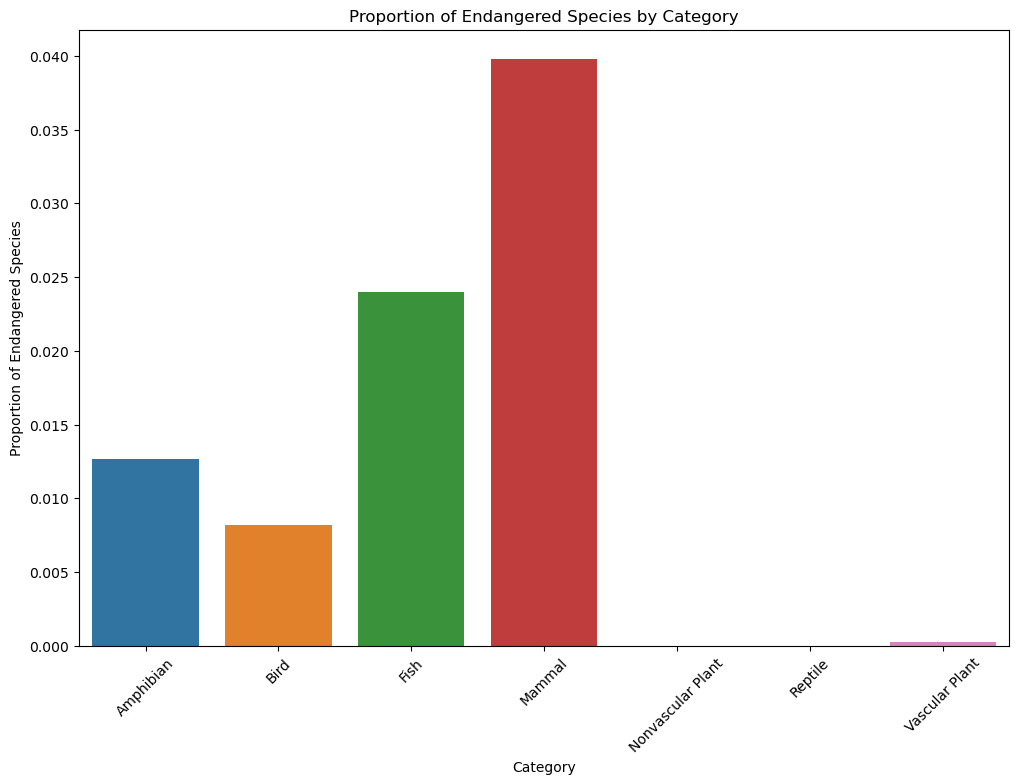

In [237]:
plt.figure(figsize=(12, 8))
sns.barplot(data=endangered_df, x='category', y='prop_endangered')
plt.title('Proportion of Endangered Species by Category')
plt.xlabel('Category')
plt.ylabel('Proportion of Endangered Species')
plt.xticks(rotation=45)
plt.show()

The 'Mammal' and 'Fish' categories have the highest proportion of endangered species.

### Which animal is most prevalent and what is their distribution amongst parks?

To find out which animal is the most prevalent, we calculate total observations for each species and sort the species by total observations in descending order. Firstly we group the merged data frame excluding categories that don't belong to animals' world.

In [137]:
filtered_df = merged_df[~merged_df['category'].isin(['Vascular Plant', 'Nonvascular Plant'])]

In [152]:
filtered_df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention
5,Neovison vison,Yellowstone National Park,218,Mammal,American Mink,No Intervention
6,Neovison vison,Bryce National Park,91,Mammal,American Mink,No Intervention
7,Neovison vison,Yosemite National Park,200,Mammal,American Mink,No Intervention
24,Spizella pusilla,Yellowstone National Park,228,Bird,Field Sparrow,No Intervention


In [139]:
print(f"Categories of species:{filtered_df.category.unique()}")

Categories of species:['Mammal' 'Bird' 'Amphibian' 'Reptile' 'Fish']


In [140]:
total_observations = filtered_df.groupby('scientific_name')['observations'].sum().reset_index()

In [154]:
total_observations = total_observations.sort_values(by='observations', ascending=False)

In [142]:
total_observations = total_observations.sort_values(by='observations', ascending=False)

In [155]:
total_observations.head()

,scientific_name,observations
144,Castor canadensis,5175
707,Puma concolor,5133
687,Procyon lotor,5076
201,Columba livia,4959
520,Myotis lucifugus,4641


In [146]:
most_prevalent_animal = total_observations.iloc[0]['scientific_name']

In [147]:
print(f"The most prevalent animal is: {most_prevalent_animal}")

The most prevalent animal is: Castor canadensis


In [148]:
most_prevalent_animal_df = filtered_df[filtered_df['scientific_name'] == most_prevalent_animal]

In [149]:
distribution_across_parks = most_prevalent_animal_df.groupby('park_name')['observations'].sum().reset_index()

In [150]:
distribution_across_parks

,park_name,observations
0,Bryce National Park,834
1,Great Smoky Mountains National Park,729
2,Yellowstone National Park,2109
3,Yosemite National Park,1503


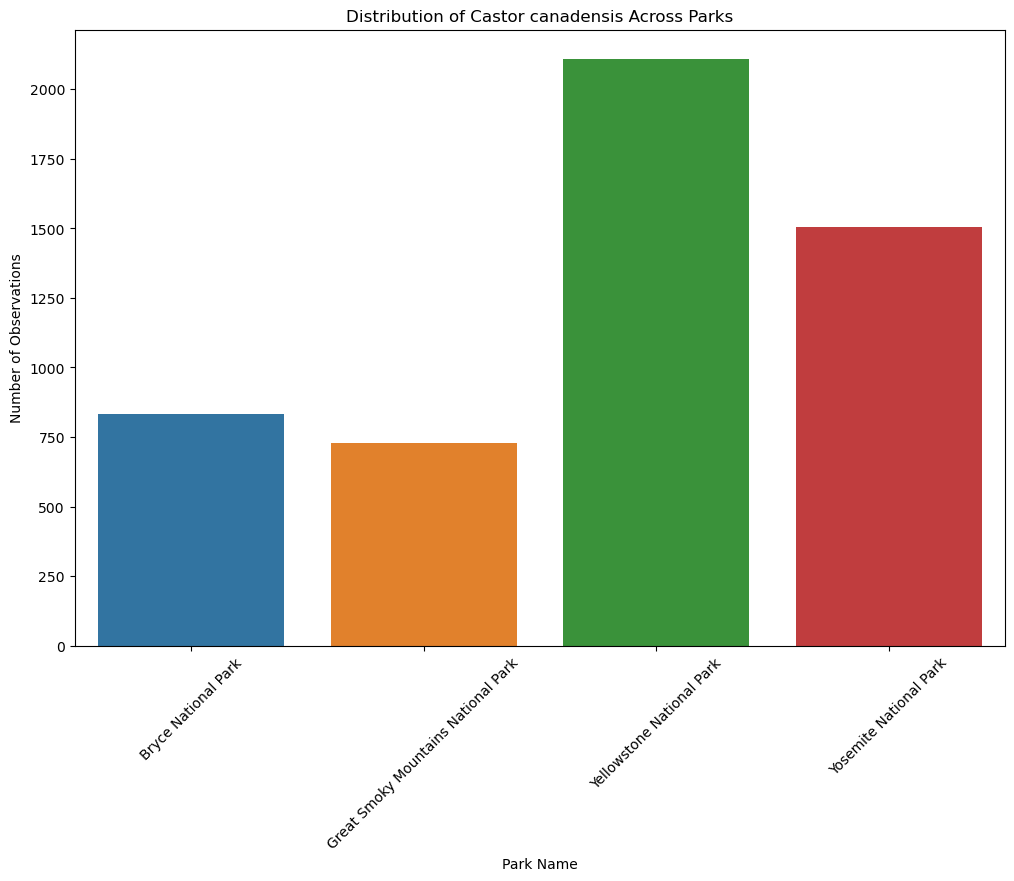

In [151]:
plt.figure(figsize=(12, 8))
sns.barplot(data=distribution_across_parks, x='park_name', y='observations')
plt.title(f'Distribution of {most_prevalent_animal} Across Parks')
plt.xlabel('Park Name')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.show()

The analysis revealed that the most prevalent species is "Castor canadensis" and the bar plot above visualizes how 
it is distributed across different parks. The number of observations of "Castor canadensis" varies significantly 
between parks what corresponds with their size.